In [ ]:
# KERAS CV를 이용한 stable diffusion

# 참고 1: https://colab.research.google.com/drive/1qqC4knC7r_C1aKo2no-I17HjRKvoQ8i7?usp=share_link
# 참고 2:

In [20]:
# keras cv 설치
!pip install --upgrade keras-cv

# 한/영 변환 패키지 설치
!pip install translate

# 그림 생성 앱
!pip install -q gradio


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.6 MB 4.7 MB/s 
     |████████████████████████████████| 84 kB 1.6 MB/s 
     |████████████████████████████████| 2.3 MB 34.3 MB/s 
     |████████████████████████████████| 54 kB 2.7 MB/s 
     |████████████████████████████████| 212 kB 52.5 MB/s 
     |████████████████████████████████| 84 kB 3.5 MB/s 
     |████████████████████████████████| 106 kB 65.1 MB/s 
     |████████████████████████████████| 56 kB 1.9 MB/s 
     |████████████████████████████████| 55 kB 2.7 MB/s 
     |████████████████████████████████| 272 kB 58.5 MB/s 
     |████████████████████████████████| 63 kB 1.7 MB/s 
     |████████████████████████████████| 80 kB 7.1 MB/s 
     |████████████████████████████████| 68 kB 5.8 MB/s 
     |████████████████████████████████| 46 kB 4.3 MB/s 
     |██

In [2]:
!nvidia-smi

Mon Oct 31 09:19:01 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   32C    P8     8W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [24]:
# 문장을 그림 바꿔주는 패키지 로드
import time
import keras_cv
from tensorflow import keras
import matplotlib.pyplot as plt

# 번역 패키지 로드
from translate import Translator

# 간단한 어플 생성 패키지
import gradio as gr


In [4]:
# stable diffusion model load
model = keras_cv.models.StableDiffusion(img_height=512,img_width=512)

1356917/1356917 [==============================] - 0s 0us/step
By using this model checkpoint, you acknowledge that its usage is subject to the terms of the CreativeML Open RAIL-M license at https://raw.githubusercontent.com/CompVis/stable-diffusion/main/LICENSE
198180272/198180272 [==============================] - 2s 0us/step


In [5]:
# 이미지 보는 방식 설정
def plot_images(images):
    plt.figure(figsize=(20,20))
    for i in range(len(images)):
        ax = plt.subplot(1, len(images), i+1)
        plt.imshow(images[i])
        plt.axis("off")
        plt.tight_layout()
        

In [6]:
# 한글 > 영어 번역
def translatorEN_KO(text):
  translator = Translator(from_lang="ko",to_lang="en")
  text_translation = translator.translate(text)
  return text_translation



A lion with a gun in the jungle.
25/25 [==============================] - 45s 2s/step


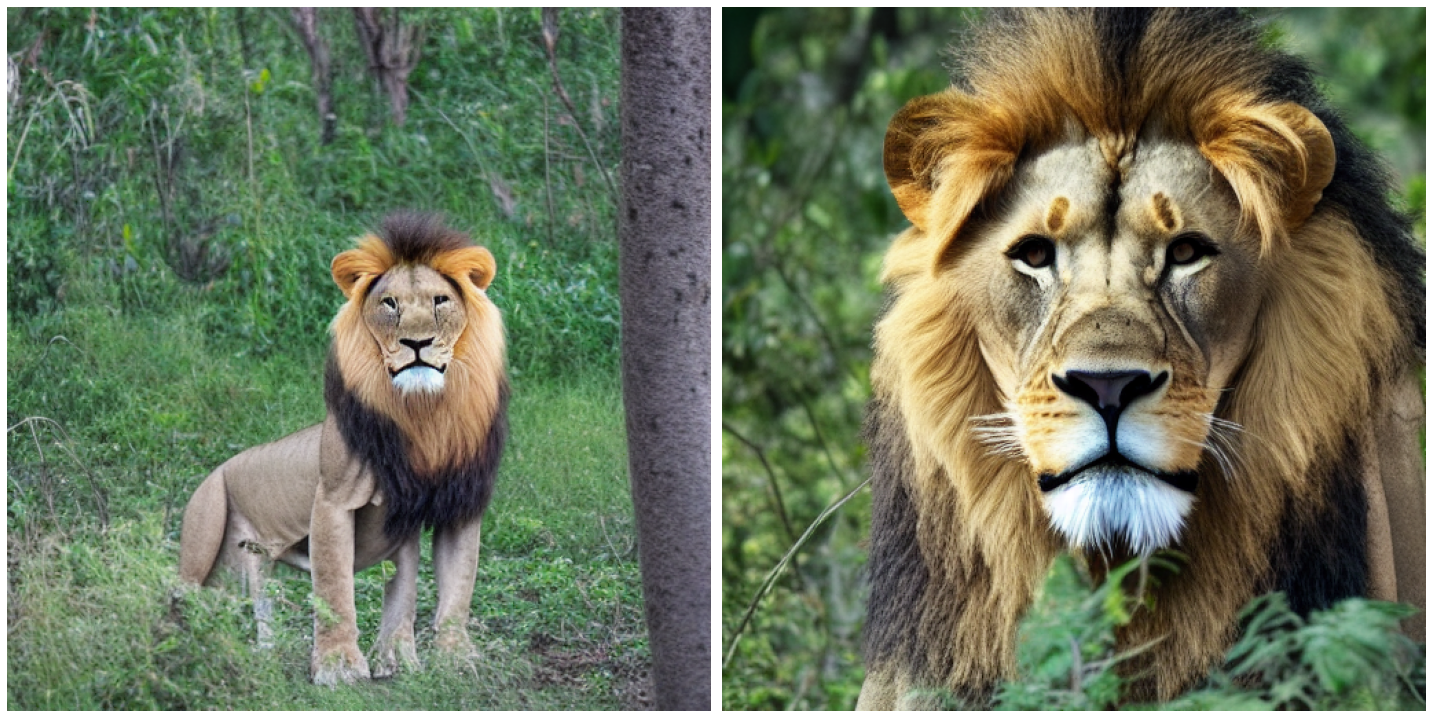

In [27]:
# standdiffusion images 생성
def create_img(text, n=2):
  translation_text = translatorEN_KO(text)
  print(translation_text)
  images = model.text_to_image(translation_text, batch_size = n)
  return images

images = create_img("정글에서 총을 든 사자")
plot_images(images)

In [ ]:
# print("텍스트를 입력하세요")
# text = input()
# print("원하는 사진 갯수를 입력하세요")
# n = int(input())
# create_img(text,n)


In [ ]:
import gradio

def inference(text):
  numberofimages = 1
  image = create_img(text,numberofimages).squeeze()
  return image

demo = gr.Interface(fn=inference, inputs='text',outputs='image')
demo.launch(debug=True)

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://4f91ab667514c959.gradio.app

This share link expires in 72 hours. For free permanent hosting and GPU upgrades (NEW!), check out Spaces: https://huggingface.co/spaces


feeding lion
25/25 [==============================] - 26s 1s/step
